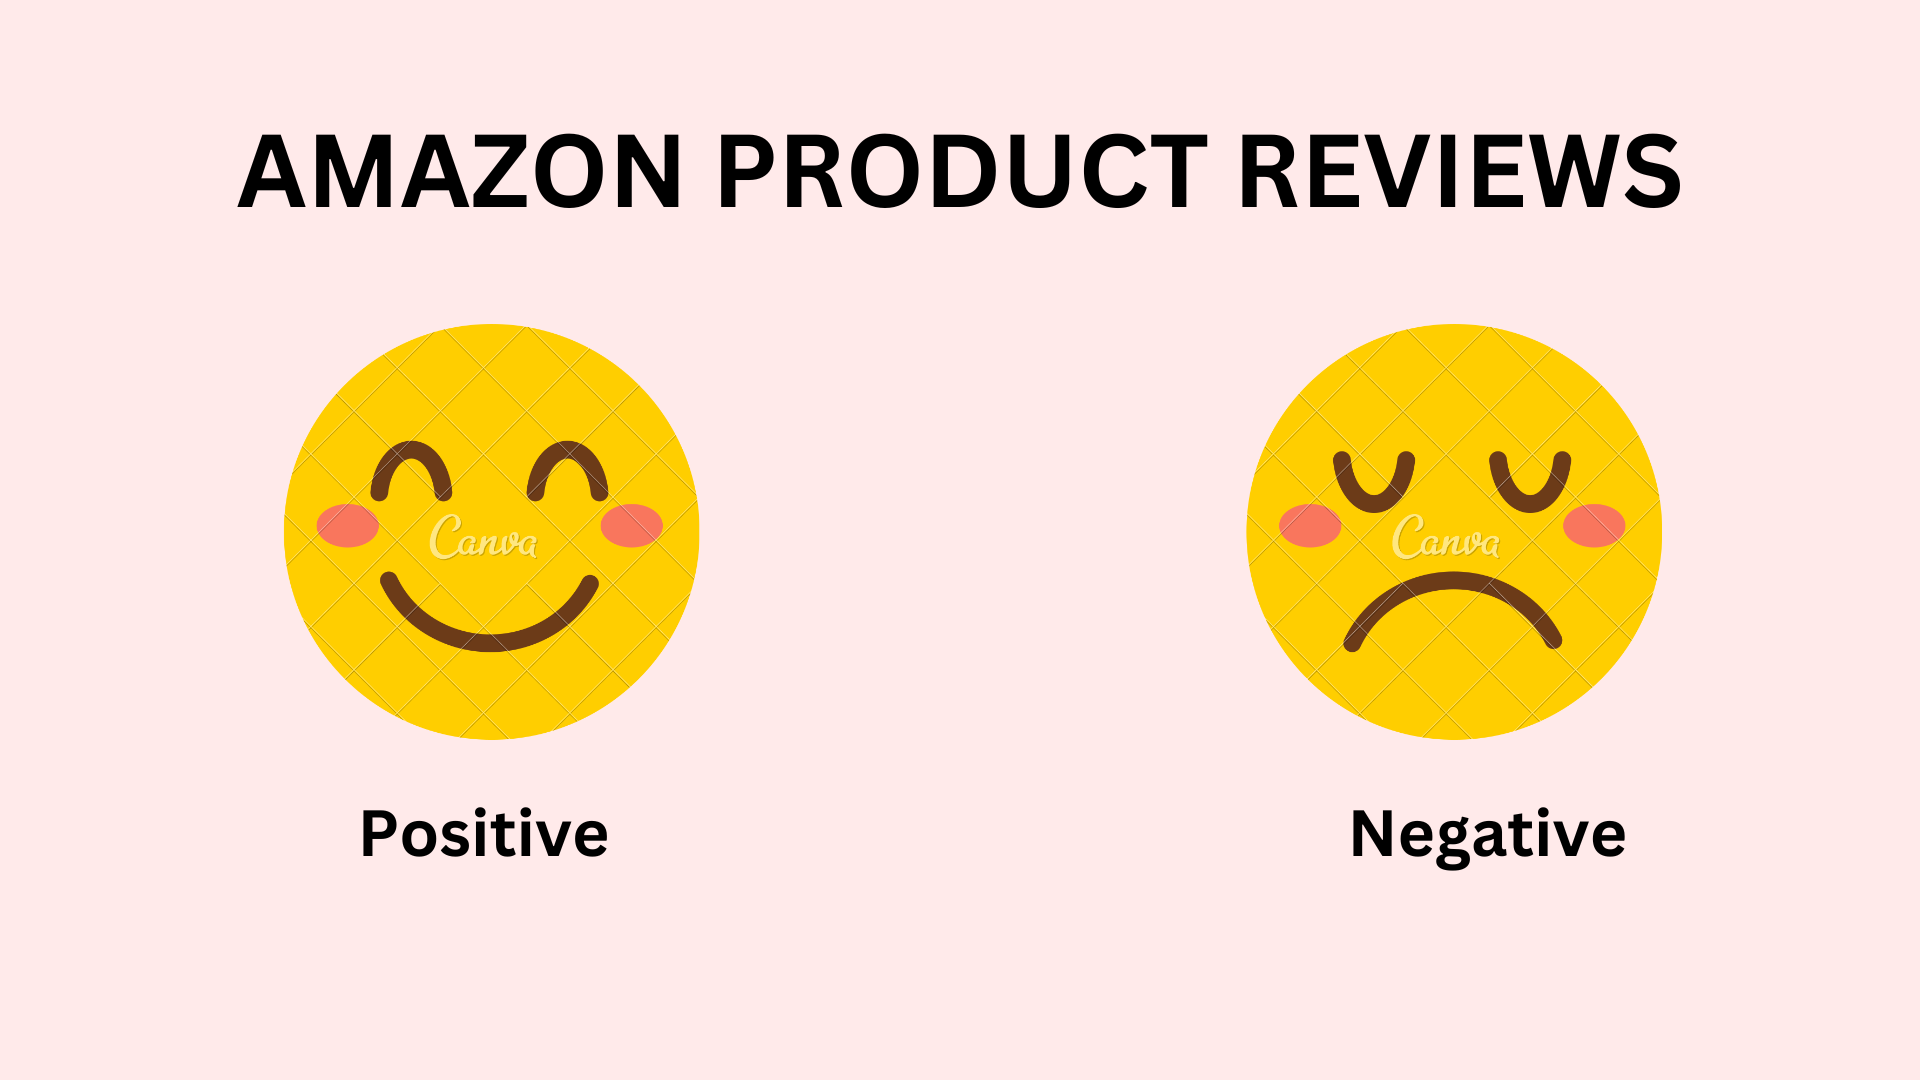

# **AMAZON PRODUCT REVIEWS: SENTIMENT ANALYSIS**

This notebook contains code that analyzes the Amazon product review dataset. I will be performing EDA, Data Preprocessing before building a sentiment analysis model.

## **Downloading and Importing the Necessary Libraries**

In [1]:
pip install wordcloud

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 100.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 103.4 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 103.4 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 100.9 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 112.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     -- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 187.9 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 187.9 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 140.3 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 126.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------- ----------- 41.0/57.6 kB 1.9 MB/s eta 0:00:01
     ---------------------------- ----------- 41.0/57.6 kB 1.9 MB/s eta 0:00:01
     ---------------------------- ----------- 41.0/57.6 kB 1.9 MB/s eta 0:00:01
     

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\miriam\appdata\local\temp\pip-req-build-wlago_x6
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [5]:
pip install spacy

     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/85.1 kB ? eta -:--:--
     ------------- ------------------------ 30.7/85.1 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/85.1 kB 326.8 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/85.1 kB 326.8 kB/s eta 0:00:01
     --------------------------- ---------- 61.4/85.1 kB 251.0 kB/s eta 0:00:01
     ------------------------------------ - 81.9/85.1 kB 286.7 kB/s eta 0:00:01
     -------------------------------------- 85.1/85.1 kB 252.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 196.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 196.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/626.3 kB 204.8 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/626.3 kB 286.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 286.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 285.2 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 285.2 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 285.2 kB/s eta 0:00:02
  

In [7]:
pip install lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 187.9 kB/s eta 0:00:21
   ---------------------------------------- 0.0/3.8 MB 187.9 kB/s eta 0:00:21
   ---------------------------------------- 0.0/3.8 MB 187.9 kB/s eta 0:00:21
   ---------------------------------------- 0.0/3.8 MB 187.9 kB/s eta 0:00:21
    --------------------------------------- 0.1/3.8 MB 156.1 kB/s eta 0:00:25
    --------------------------------------- 0.1/3.8 MB 156.1 kB/s eta 0:00:25
    --------------------------------------- 0.1/3.8 MB 169.9 kB/s eta 0:00:22
    --------------------------------------- 0.1/3.8 MB 194.1 kB/s eta 0:00:20
    ---------------------------

In [8]:
pip install imblearn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 k

In [10]:
pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 325.1 kB/s eta 0:00:36
   ---------------------------------------- 0.0/11.5 MB 325.1 kB/s eta 0:00:36
   ---------------------------------------- 0.0/11.5 MB 178.6 kB/s eta 0:01:05
   ---------------------------------------- 0.0/11.5 MB 178.6 kB/s eta 0:01:05
   ---------------------------------------- 0.0/11.5 MB 178.6 kB/s eta 0:01:05
   ---------------------------------------- 0.0/11.5 MB 178.6 kB/s eta 0:01:05
   ---------------------------------------- 0.1/11.5 MB 163.8 kB/s eta 0:01:10
   ---------------------------------------- 0.1/11.5 MB 194.1 kB/s eta 0:00:59
   ---------------------------------------- 0.1/11.5 MB 194.1 kB/s eta 0:00:59
   ---------------------------------------- 0.1/11.5 MB 194.1 kB/s eta 0:00:59

In [11]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   ----- ---------------------------------- 41.0/294.9 kB 98.5 kB/s eta 0:00:03
   -------- ------------------------------ 61.4/294.9 kB 148.8 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 176.6 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 176.6 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 174.7 kB/s eta 0:00:02
   

In [38]:
pip install streamlit

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 210.1 kB/s eta 0:00:39
   ---------------------------------------- 0.1/8.1 MB 210.1 kB/s eta 0:00:39
    --------------------------------------- 0.1/8.1 MB 253.9 kB/s eta 0:00:32
    --------------------------------------- 0.1/8.1 MB 258.5 kB/s eta 0:00:31
   

In [ ]:
pip install preprocess_kgptalkie

In [39]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


**NOTE: Make sure to run this line of code in the command line/terminal after installing the library `spacy` so as to avoid
an error popping up when you run the cell importing all the necessary libraries below.** 



```python -m spacy download en_core_web_sm```



**The above code will help to download the model necessary for the successful running of the cell below without a hitch or rather without errors.**

In [ ]:
import pandas as pd
import warnings
import nltk
import re
import lxml
import preprocess_kgptalkie as ps
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, roc_curve, confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from imblearn.over_sampling import SMOTE
import joblib


warnings.filterwarnings("ignore")

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Miriam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Miriam\AppData\Roaming\nltk_data...


True

## **Exploratory Data Analysis**

In [17]:
df = pd.read_csv("C:\FLiT Project\FLiT-Apprenticeship-Data-Science-Projects\Project_3 Sentiment-Analysis-for-Product-Reviews\Amazon-Product-Reviews - Amazon Product Review (1).csv")

In [18]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [19]:
#getting the shape
df.shape

(30846, 16)

In [20]:
df.info()  #getting the info summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

From the above we can see that our review_date isn't in the right data type so we will change that.

In [21]:
#changing the data type of our review date to the right dtype
df["review_date"] = pd.to_datetime(df.review_date)
df.review_date.dtype

dtype('<M8[ns]')

Now that has been changed let's move forward with our analysis.

In [22]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64

In [23]:
# checking to see if we have any duplicates
df.duplicated().sum()

0

In [24]:
#from using our `isnull()` method, we found out that two of our columns have missing values
#dropping null
df.dropna(inplace = True)
#checking to see if the above line of code has been carried out
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [25]:
#checking the number of unique values we have in our dataset
for column in df.columns:
  print(column, ":", df[column].nunique())

marketplace : 1
customer_id : 30839
review_id : 30840
product_id : 21
product_parent : 1
product_title : 1
product_category : 1
star_rating : 5
helpful_votes : 71
total_votes : 80
vine : 1
verified_purchase : 2
review_headline : 15715
review_body : 27759
review_date : 333
sentiment : 2


From the above we can conclude that we are dealing with only one country, one product(parent,title and category) and also one vine. This information will help in the data visualization section.

In [26]:
df.describe() #to get a statistic summary of our dataset

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_date,sentiment
count,3.084000e+04,30840.0,30840.000000,30840.000000,30840.000000,30840,30840.000000
mean,2.470843e+07,2693241.0,4.336316,0.686543,0.894942,2015-03-11 10:55:22.645914624,0.835376
min,1.134600e+04,2693241.0,1.000000,0.000000,0.000000,2014-10-03 00:00:00,0.000000
25%,1.150586e+07,2693241.0,4.000000,0.000000,0.000000,2015-01-04 00:00:00,1.000000
50%,2.294012e+07,2693241.0,5.000000,0.000000,0.000000,2015-02-16 00:00:00,1.000000
75%,4.008417e+07,2693241.0,5.000000,0.000000,0.000000,2015-05-17 00:00:00,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.000000,3875.000000,2015-08-31 00:00:00,1.000000
std,1.611152e+07,0.0,1.120569,30.746359,32.359474,NaN,0.370847


Before we move on to finding trends and patterns in our dataset, I will create some new columns for easy data visualization.

In [27]:
#from our review_date column I will extract new columns that show the year and month each review was made
df["month"] = df["review_date"].dt.month
df["year"] = df["review_date"].dt.year

In [28]:
#checking to see how many years we have in our dataset
df["year"].value_counts()

year
2015    25020
2014     5820
Name: count, dtype: int64

## **Data Visualizations**

Now that we have our columns sorted out, we will move on to the data visualization aspect. For this section, we will be finding trends and patterns in the dataset. The flow of this section will look like this:

`Univariate Visualization --- Bivariate Visualization`

[Learn more about Univariate and Bivariate Analysis]("https://www.geeksforgeeks.org/what-is-univariate-bivariate-multivariate-analysis-in-data-visualisation/")


### **Univariate Analysis**

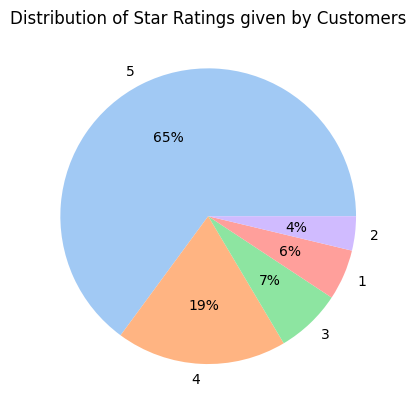

In [29]:
#visualizing the disribution of star ratings given by customers
rating = dict(df["star_rating"].value_counts())
palette = sns.color_palette("pastel")
plt.pie(rating.values(), labels = rating.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Star Ratings given by Customers")
plt.show()

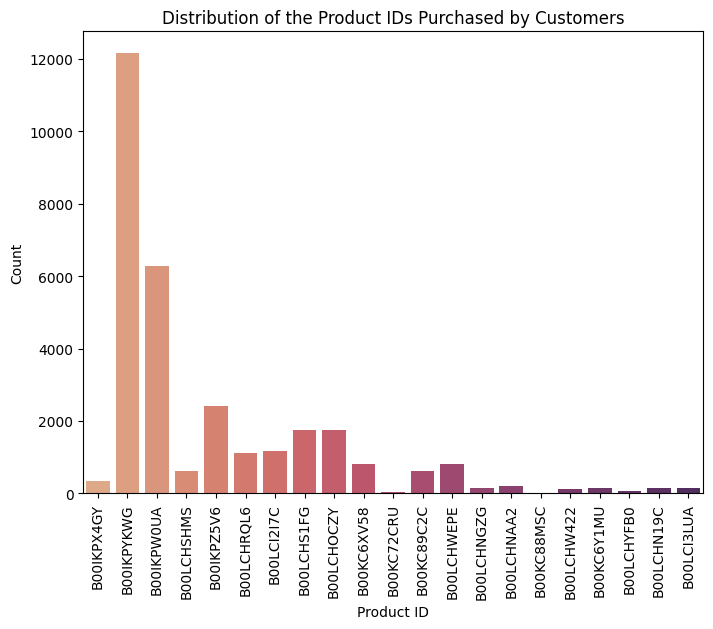

In [30]:
#visualizing the distribution of the products by their IDs bought by the customers
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "product_id", palette = "flare")
plt.title("Distribution of the Product IDs Purchased by Customers")
plt.xticks(rotation = 90)
plt.xlabel("Product ID")
plt.ylabel("Count");

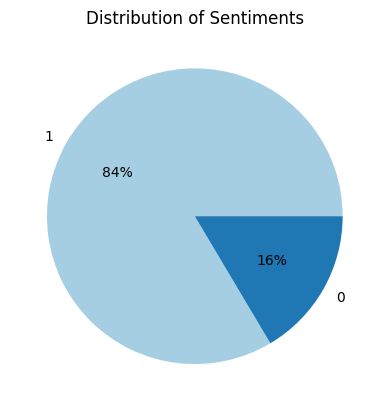

In [31]:
#creating a distribution of the percentage of sentiments
sent = dict(df["sentiment"].value_counts())
palette = sns.color_palette("Paired")
plt.pie(sent.values(), labels = sent.keys(), autopct = "%.0f%%",colors = palette)
plt.title("Distribution of Sentiments")
plt.show()

### **Bivariate Analysis**

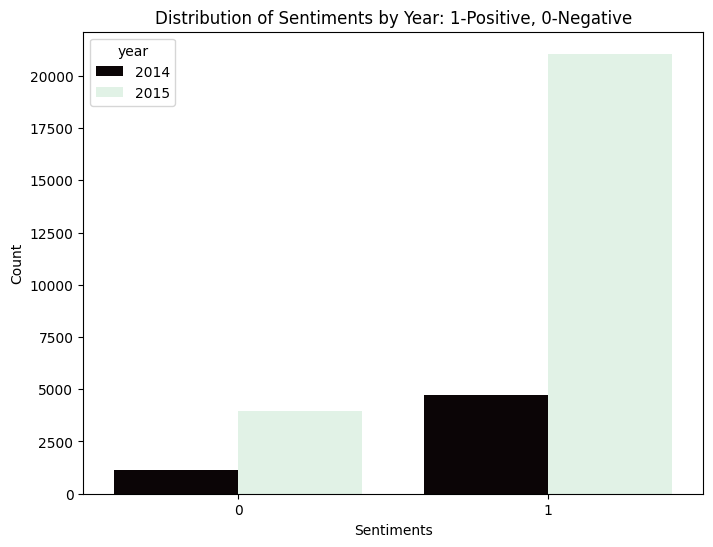

In [32]:
#creating a visualization to show the relationship between the sentiments and the years available
plt.figure(figsize = (8,6))
sns.countplot(df, x = "sentiment", hue = "year", palette = "mako")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.title("Distribution of Sentiments by Year: 1-Positive, 0-Negative");

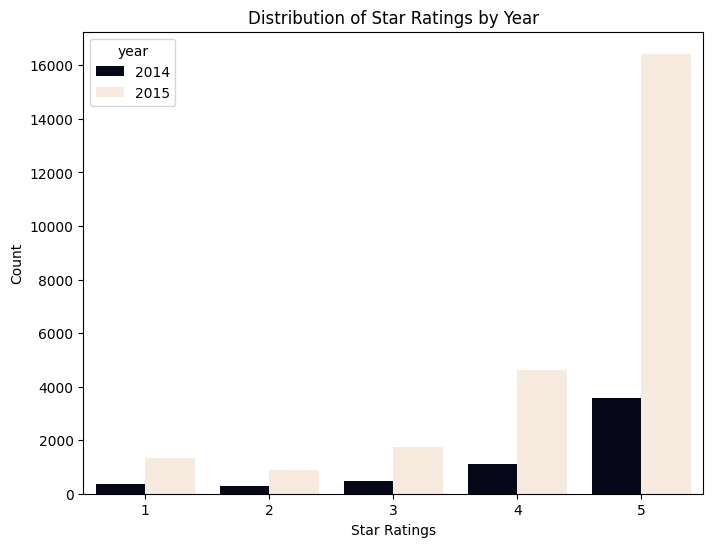

In [33]:
#moving on to bivariate analysis. we will see the relation between the star ratings and the year
plt.figure(figsize = (8,6))
sns.countplot(df, x = "star_rating", hue  = "year", palette = "rocket")
plt.xlabel("Star Ratings")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings by Year");

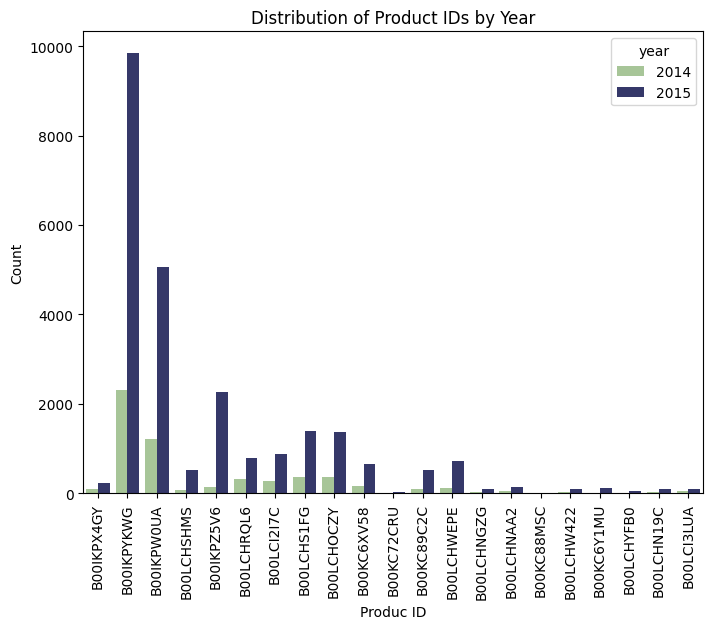

In [34]:
#creating a visual between the product IDs and years
plt.figure(figsize = (8,6))
sns.countplot(df, x = "product_id", hue = "year",palette = "crest")
plt.xlabel("Produc ID")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Distribution of Product IDs by Year");

### **Interpretation of Data Visualization Results**

From the above univariate and bivariate analysis, the following can be found in the visualizations:
1. Amazon products on a scale of 1-5, with one being bad and 5 being excellent, have a 65% of excellent ratings.
2. The 5 star rating for products increased massively in the year 2015.
3. Positive sentiments also garnered much percentage than that of the negative sentiments-84% for positive and 16% for negative. There is also a massive increase in positive sentiments in the year 2015.
4. In all 2015, showed that customers were pleased with their purchases. 

## **Data Cleaning**

In this stage, we will be performing data preprocessing before converting our date into vectors and passing it into our chosen machine learning model. In order of occurence:
1. we will be getting rid of characters that are not alphabets using a regular expression
2. In addition to all that, we will be converting the records to lowercase so as to avoid problems when we get to the vectorization stage.
3. Next, we will also be removing stopwords as they do not necessarily add any meaning.
4. We will then perform lemmatization and return a corpus of processed data. [Learn more](https://www.analyticsvidhya.com/blog/2021/06/nlp-sentiment-analysis/)

In [35]:
# creating an object of WordNetLemmatizer
wn = WordNetLemmatizer()

In [36]:
#creating a function to perform our preprocessing of data
def data_transform(data):
    corpus = [] #this will hold our new preprocessed data
    for item in data: #iterating through our data
        new_item = re.sub('[^a-zA-Z]',' ',str(item)) #this will select characters that are not alphabets and replace them with a space and convert to a string
        new_item = new_item.lower() #changing data to lower case
        new_item = new_item.split() #performing tokenization by splitting the string into a list of word
        new_item = [wn.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))] #returns the lemma of each word in the list and removes stopwords in the process
        corpus.append(' '.join(str(x) for x in new_item)) #joining our processed data into a sentence and appending it to our empty list 
    return corpus

In [37]:
corpus = data_transform(df['review_body'])

The Word Cloud section below helps us to see how our data looks after preprocessng and we get to see the most common words for positive and negative reviews each

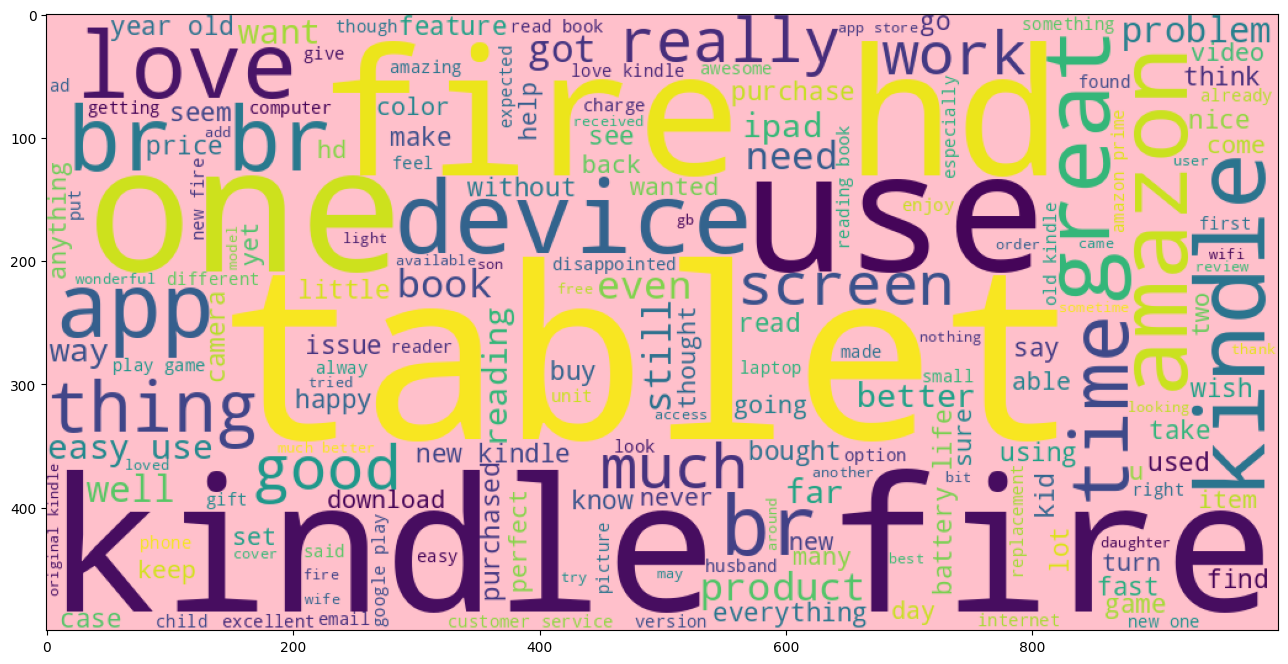

In [26]:
# since we now have a clean and preprocessed data, we will create a word cloud to see how the data looks
rcParams["figure.figsize"] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+= " ".join(word)
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'pink', min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

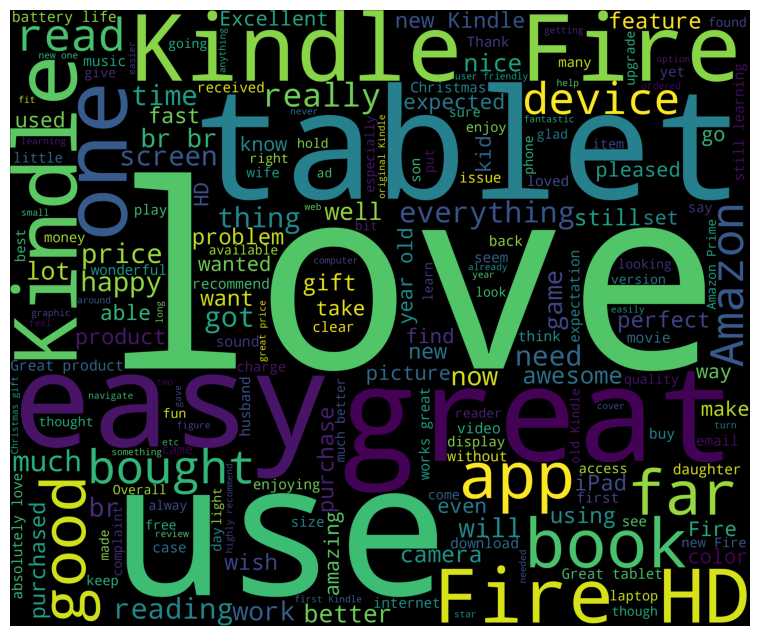

In [27]:
#WordCloud - Sentiment Positive

df1 = df[df['sentiment']== 1]
words = ' '.join(df1['review_body'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

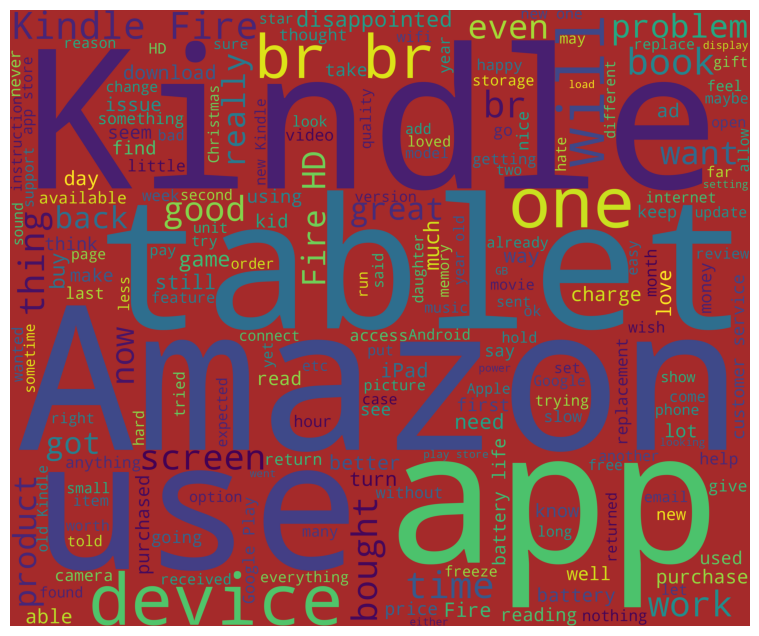

In [28]:
df2 = df[df["sentiment"] == 0]
words = ' '.join(df2["review_body"].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='brown',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Data Cleaning with Preprocess_kgptalkie**

In this section, we will be doing data cleaing with the python library `preprocess_kgptalkie` just like we did previously with the `WordLemmitizer`. This is just to provide two different ways we can go about cleaning our data for eays model building and accurate predictions

In [29]:
#cleaning our data 
df["review_body"] = df["review_body"].apply(lambda x: x.lower())
df["review_body"] = df["review_body"].apply(lambda x: ps.remove_urls(x))
df["review_body"] = df["review_body"].apply(lambda x: ps.remove_accented_chars(x))
df["review_body"] = df["review_body"].apply(lambda x: ps.remove_html_tags(x))
df["review_body"] = df["review_body"].apply(lambda x: ps.remove_special_chars(x))

Moving on to data splitting and model building.

## **Data Splitting and Machine Learning Model Building**

Since we have a preprocessed data, we will be splitting our data into test and train data then perform vectorization.

**We have a highly imbalanced dataset making us have more of Positive class over Negative class. If we build with our model with our imbalanced dataset our model will be biased to the majority class. To avoid this we will be using the SMOTE technique on our training data so as to have more negative classess we can build our model with.**

In [30]:
X = corpus
y = df["sentiment"]

In [31]:
# creating an instance of our count vectorizer which will be used to convert our text data into vectors  
#the CountVectorizer is a fundamental step in NLP for converting text data 
#into a format suitable for machine learning models. 
cv = CountVectorizer(ngram_range = (1,2))

In [32]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                            random_state = 15, stratify = y)

In [33]:
#splitting with pur preprocessed data from preprocess_kgptalkie
X_2 = df["review_body"]
y_2 = df["sentiment"]

In [34]:
#split to training and test data
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.2, 
                                                            random_state = 15, stratify = y_2)

### **Model Building and Evaluation**

In [35]:
#fit and transform the training data
X_train_df = cv.fit_transform(X_train)

In [36]:
smote = SMOTE(sampling_strategy = "minority")
X_sm, y_sm = smote.fit_resample(X_train_df, y_train)

In [37]:
#instantiate model
rfc = RandomForestClassifier(n_jobs = -1)
#fit the data
rfc.fit(X_sm, y_sm)

RandomForestClassifier(n_jobs=-1)

In [38]:
#transform our test data
X_test_df = cv.transform(X_test)

#apply smote
X_t_sm, y_t_sm = smote.fit_resample(X_test_df, y_test)
#make predictions
predict = rfc.predict(X_t_sm)

In [39]:
#Model Evaluation
accuracy = accuracy_score(y_t_sm, predict)
precision = precision_score(y_t_sm, predict)
recall = recall_score(y_t_sm,predict)
print("*"*50)
print('Accuracy Score: ', accuracy)
print('Precison Score: ', precision)
print('Recall Score: ', recall)
print("*"*50)
report = classification_report(y_t_sm,predict)
print(report)

**************************************************
Accuracy Score:  0.8953037065786921
Precison Score:  0.8943089430894309
Recall Score:  0.8965651077042499
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5153
           1       0.89      0.90      0.90      5153

    accuracy                           0.90     10306
   macro avg       0.90      0.90      0.90     10306
weighted avg       0.90      0.90      0.90     10306



**There is a great performance of our model. Our F1- scores are really good and this is because we were able to deal with pur imbalanced target variable by using SMOTE which helped to generate synthetic samples for our minority class making it equal with our majority class.**

In [40]:
from nltk.corpus import stopwords
from imblearn.pipeline import Pipeline as ImbPipeline
stopwords_list = stopwords.words('english')

In [ ]:
# Create TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer()

#convert text data into numerical form
X_2_train_df = tfidf_vectorizer.fit_transform(X_2_train)


In [ ]:
#dealing with our data imbalance
smote = SMOTE(sampling_strategy = "minority")
X_sm_1, y_sm_1 = smote.fit_resample(X_2_train_df, y_2_train)

In [ ]:
#transform our test data
X_2_test_df = tfidf_vectorizer.transform(X_2_test)

#apply smote
X_2_sm, y_2_sm = smote.fit_resample(X_2_test_df, y_2_test)

In [ ]:
rf = RandomForestClassifier(n_jobs = -1)
rf.fit(X_sm_1, y_sm_1)

In [ ]:
#predictions
predicted = rf.predict(X_2_sm)

In [ ]:
#evaluation
acc__ = accuracy_score(y_2_sm, predicted)
print("Accuracy score: ", acc__)
print("*"*50)
print(classification_report(y_2_sm,predicted))

In [41]:
#model building and testing for our preprocessed data from preprocess_kgptalkie
clf = ImbPipeline([("tfid",TfidfVectorizer(stop_words = stopwords_list)),
                   ("smote", SMOTE(sampling_strategy = "minority")),
                ("rf", RandomForestClassifier(n_jobs = -1))])

#fitting
clf.fit(X_2_train, y_2_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('smote', SMOTE(sampling_strategy='minority')),
                ('rf', RandomForestClassifier(n_jobs=-1))])

In [42]:
#predictions
predictions = clf.predict(X_2_test)

In [43]:
#evaluation
acc = accuracy_score(y_2_test, predictions)
print("Accuracy score: ", acc)
print("*"*50)
print(classification_report(y_2_test,predictions))

Accuracy score:  0.8795395590142672
**************************************************
              precision    recall  f1-score   support

           0       0.61      0.73      0.66      1015
           1       0.94      0.91      0.93      5153

    accuracy                           0.88      6168
   macro avg       0.78      0.82      0.80      6168
weighted avg       0.89      0.88      0.88      6168



In [44]:
#model testing
clf.predict(["great"])

array([1])

In [ ]:
test = ["I love this product"]
test_ = cv.fit_transform(test)
rfc.predict(test_)

### **DEPLOYMENT: Saving our Model for Streamlit Deployment**

In [44]:
#model saving
joblib.dump(clf,"Sentiment_Analysis_Model.joblib")

['Sentiment_Analysis_Model.joblib']

In [ ]:
#model saving
joblib.dump(rf,"Sentiment_Analysis_Reviewed.joblib")

In [45]:
#model saving
joblib.dump(rfc,"Amazon_Sentiment_Analysis_Model.joblib")

['Amazon_Sentiment_Analysis_Model.joblib']